In this notebook I preprocess the data and create a final df with all necessary info for our ML model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
month = "04"
path  = f"data/od-trips-2019/2019-{month}.csv"
april_2019_OD = pd.read_csv(path)
april_2019_OD

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
0,2019-04-30T23:59:35,2019-05-01T00:00:36,43,Karhupuisto,43.0,Karhupuisto,2.0,57
1,2019-04-30T23:59:31,2019-05-01T00:09:00,140,Verkatehtaanpuisto,134.0,Haukilahdenkatu,2196.0,569
2,2019-04-30T23:59:25,2019-04-30T23:59:46,121,Vilhonvuorenkatu,121.0,Vilhonvuorenkatu,0.0,20
3,2019-04-30T23:59:21,2019-05-01T00:09:20,39,Ooppera,44.0,Sörnäisten metroasema,2121.0,596
4,2019-04-30T23:59:19,2019-05-01T00:18:12,57,Lauttasaaren ostoskeskus,63.0,Jätkäsaarenlaituri,2460.0,1127
...,...,...,...,...,...,...,...,...
406675,2019-04-01T06:12:01,2019-04-01T06:31:09,35,Cygnauksenkatu,128.0,Päijänteentie,0.0,1144
406676,2019-04-01T06:08:41,2019-04-01T06:14:24,26,Kampin metroasema,64.0,Tyynenmerenkatu,1611.0,339
406677,2019-04-01T06:04:00,2019-04-01T06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812
406678,2019-04-01T05:53:14,2019-04-01T05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190


In [3]:
np.sort(pd.unique(april_2019_OD["Departure station id"]))

array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 100, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 161, 163, 200, 201, 202, 203, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

In [4]:
april_2019_OD.loc[april_2019_OD["Departure station id"] == 273, "Departure station name"]

3890      Kauppakartanonkuja
4201      Kauppakartanonkuja
7580      Kauppakartanonkuja
10178     Kauppakartanonkuja
11806     Kauppakartanonkuja
                 ...        
220003    Kauppakartanonkuja
220013    Kauppakartanonkuja
230387    Kauppakartanonkuja
235771    Kauppakartanonkuja
237993    Kauppakartanonkuja
Name: Departure station name, Length: 72, dtype: object

In [5]:
len(np.sort(pd.unique(april_2019_OD["Departure station id"])))

341

In [6]:
df = april_2019_OD.copy()
df['Departure'] = pd.to_datetime(df['Departure'], errors='coerce', format='mixed')
df['Return'] = pd.to_datetime(df['Return'], errors='coerce', format='mixed')

df['dep_hour'] = df['Departure'].dt.floor('h')
df['ret_hour'] = df['Return'].dt.floor('h')
df

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),dep_hour,ret_hour
0,2019-04-30 23:59:35,2019-05-01 00:00:36,43,Karhupuisto,43.0,Karhupuisto,2.0,57,2019-04-30 23:00:00,2019-05-01 00:00:00
1,2019-04-30 23:59:31,2019-05-01 00:09:00,140,Verkatehtaanpuisto,134.0,Haukilahdenkatu,2196.0,569,2019-04-30 23:00:00,2019-05-01 00:00:00
2,2019-04-30 23:59:25,2019-04-30 23:59:46,121,Vilhonvuorenkatu,121.0,Vilhonvuorenkatu,0.0,20,2019-04-30 23:00:00,2019-04-30 23:00:00
3,2019-04-30 23:59:21,2019-05-01 00:09:20,39,Ooppera,44.0,Sörnäisten metroasema,2121.0,596,2019-04-30 23:00:00,2019-05-01 00:00:00
4,2019-04-30 23:59:19,2019-05-01 00:18:12,57,Lauttasaaren ostoskeskus,63.0,Jätkäsaarenlaituri,2460.0,1127,2019-04-30 23:00:00,2019-05-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
406675,2019-04-01 06:12:01,2019-04-01 06:31:09,35,Cygnauksenkatu,128.0,Päijänteentie,0.0,1144,2019-04-01 06:00:00,2019-04-01 06:00:00
406676,2019-04-01 06:08:41,2019-04-01 06:14:24,26,Kampin metroasema,64.0,Tyynenmerenkatu,1611.0,339,2019-04-01 06:00:00,2019-04-01 06:00:00
406677,2019-04-01 06:04:00,2019-04-01 06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812,2019-04-01 06:00:00,2019-04-01 06:00:00
406678,2019-04-01 05:53:14,2019-04-01 05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190,2019-04-01 05:00:00,2019-04-01 05:00:00


In [7]:
# --- Hourly DEPARTURES per station ---
departures = (
    df.groupby(['Departure station id', 'dep_hour'])
      .size()
      .reset_index(name='departures')
      .rename(columns={'Departure station id': 'station_id', 'dep_hour': 'hour'})
)

# --- Hourly ARRIVALS per station ---
arrivals = (
    df.groupby(['Return station id', 'ret_hour'])
      .size()
      .reset_index(name='arrivals')
      .rename(columns={'Return station id': 'station_id', 'ret_hour': 'hour'})
)

# --- Merge them together (outer join to include hours with only dep/arr) ---
station_hourly = pd.merge(departures, arrivals,on=['station_id', 'hour'], how='outer').fillna(0)

In [8]:
station_hourly

,station_id,hour,departures,arrivals
0,1.0,2019-04-01 08:00:00,0.0,2.0
1,1.0,2019-04-01 12:00:00,0.0,2.0
2,1.0,2019-04-01 14:00:00,0.0,2.0
3,1.0,2019-04-01 15:00:00,0.0,2.0
4,1.0,2019-04-01 16:00:00,0.0,4.0
...,...,...,...,...
129343,997.0,2019-04-29 08:00:00,0.0,1.0
129344,997.0,2019-04-29 14:00:00,0.0,1.0
129345,997.0,2019-04-30 09:00:00,1.0,0.0
129346,997.0,2019-05-01 20:00:00,0.0,1.0


In [9]:
# Get full range of hours and all station IDs
hours = pd.date_range(df['Departure'].min().floor('h'),
                      df['Return'].max().ceil('h'),
                      freq='H')
stations = df['Departure station id'].unique()

# Create full index
multi_index = pd.MultiIndex.from_product([stations, hours], names=['station_id', 'hour'])
full = pd.DataFrame(index=multi_index).reset_index()

# Merge with your counts and fill missing values with 0
station_hourly_full = pd.merge(full, station_hourly,on=['station_id', 'hour'], how='left').fillna(0)

station_hourly_full

/tmp/ipykernel_627892/3158355427.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(df['Departure'].min().floor('h'),


,station_id,hour,departures,arrivals
0,43,2019-04-01 05:00:00,0.0,0.0
1,43,2019-04-01 06:00:00,0.0,0.0
2,43,2019-04-01 07:00:00,0.0,0.0
3,43,2019-04-01 08:00:00,0.0,0.0
4,43,2019-04-01 09:00:00,1.0,0.0
...,...,...,...,...
419425,995,2019-05-22 06:00:00,0.0,0.0
419426,995,2019-05-22 07:00:00,0.0,0.0
419427,995,2019-05-22 08:00:00,0.0,0.0
419428,995,2019-05-22 09:00:00,0.0,0.0


In [10]:
station_hourly_full['weekday'] = station_hourly_full['hour'].dt.dayofweek
station_hourly_full['month']   = station_hourly_full['hour'].dt.month
station_hourly_full['hour_of_day'] = station_hourly_full['hour'].dt.hour
station_hourly_full

,station_id,hour,departures,arrivals,weekday,month,hour_of_day
0,43,2019-04-01 05:00:00,0.0,0.0,0,4,5
1,43,2019-04-01 06:00:00,0.0,0.0,0,4,6
2,43,2019-04-01 07:00:00,0.0,0.0,0,4,7
3,43,2019-04-01 08:00:00,0.0,0.0,0,4,8
4,43,2019-04-01 09:00:00,1.0,0.0,0,4,9
...,...,...,...,...,...,...,...
419425,995,2019-05-22 06:00:00,0.0,0.0,2,5,6
419426,995,2019-05-22 07:00:00,0.0,0.0,2,5,7
419427,995,2019-05-22 08:00:00,0.0,0.0,2,5,8
419428,995,2019-05-22 09:00:00,0.0,0.0,2,5,9


In [11]:
len(np.sort(pd.unique(station_hourly_full["station_id"])))

341

## number of current bikes available = full capacity - departures + arrivals

In [12]:
cap_df = pd.read_csv("data/Helsingin_ja_Espoon_kaupunkipyöräasemat_avoin_7704606743268189464.csv")
cap_df

,FID,ID,Nimi,Namn,Name,Osoite,Adress,Kaupunki,Stad,Operaattor,Kapasiteet,x,y,x2,y2
0,1,501,Hanasaari,Hanaholmen,Hanasaari,Hanasaarenranta 1,Hanaholmsstranden 1,Espoo,Esbo,CityBike Finland,10,24.840319,60.165820,2.549113e+07,6.672558e+06
1,2,503,Keilalahti,Kägelviken,Keilalahti,Keilalahdentie 2,Kägelviksvägen 2,Espoo,Esbo,CityBike Finland,28,24.827467,60.171524,2.549042e+07,6.673195e+06
2,3,505,Westendinasema,Westendstationen,Westendinasema,Westendintie 1,Westendvägen 1,Espoo,Esbo,CityBike Finland,16,24.805758,60.168266,2.548922e+07,6.672836e+06
3,4,507,Golfpolku,Golfstigen,Golfpolku,Golfpolku 3,Golfstigen 3,Espoo,Esbo,CityBike Finland,16,24.796136,60.168143,2.548868e+07,6.672824e+06
4,5,509,Revontulentie,Norrskensvägen,Revontulentie,Revontulentie 10,Norrskensvägen 10,Espoo,Esbo,CityBike Finland,30,24.802938,60.171551,2.548906e+07,6.673202e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,401,Koivusaari (M),Björkholmens metrostation,Koivusaari metro station,Sotkatie 11,Dykandsvägen 11,,,,16,24.855164,60.163386,2.549196e+07,6.672285e+06
453,454,402,Bermudankuja,Bermudagränden,Välimerenkatu,Atlantinkatu 10,Atlantgatan 10,,,,16,24.910142,60.154904,2.549501e+07,6.671335e+06
454,455,403,Verkkosaari,Nätholmen,Verkkosaari,Tukkutorinkuja 3,Partitorgsgränden,,,,20,24.977548,60.189556,2.549875e+07,6.675192e+06
455,456,404,Sompasaari,Sumparn,Sompasaari,Sompasaarenlaituri 2,Sumparkajen 2,,,,14,24.976076,60.182931,2.549867e+07,6.674454e+06


In [14]:
(np.sort(pd.unique(cap_df["ID"])))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  98,  99, 100, 101, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 161, 162, 163, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 22

In [15]:
cap_df = cap_df[['ID', 'Kapasiteet']]
cap_df

,ID,Kapasiteet
0,501,10
1,503,28
2,505,16
3,507,16
4,509,30
...,...,...
452,401,16
453,402,16
454,403,20
455,404,14


In [16]:
cap_df.rename(columns={'ID': 'station_id', 'Kapasiteet': 'capacity'}, inplace=True)

/tmp/ipykernel_627892/1304793450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_df.rename(columns={'ID': 'station_id', 'Kapasiteet': 'capacity'}, inplace=True)


In [17]:
cap_df

,station_id,capacity
0,501,10
1,503,28
2,505,16
3,507,16
4,509,30
...,...,...
452,401,16
453,402,16
454,403,20
455,404,14


In [18]:
station_hourly

,station_id,hour,departures,arrivals
0,1.0,2019-04-01 08:00:00,0.0,2.0
1,1.0,2019-04-01 12:00:00,0.0,2.0
2,1.0,2019-04-01 14:00:00,0.0,2.0
3,1.0,2019-04-01 15:00:00,0.0,2.0
4,1.0,2019-04-01 16:00:00,0.0,4.0
...,...,...,...,...
129343,997.0,2019-04-29 08:00:00,0.0,1.0
129344,997.0,2019-04-29 14:00:00,0.0,1.0
129345,997.0,2019-04-30 09:00:00,1.0,0.0
129346,997.0,2019-05-01 20:00:00,0.0,1.0


In [28]:
stations_binary = station_hourly.copy()
stations_binary = stations_binary.merge(cap_df, on="station_id", how="left")
stations_binary

,station_id,hour,departures,arrivals,capacity
0,1.0,2019-04-01 08:00:00,0.0,2.0,30.0
1,1.0,2019-04-01 12:00:00,0.0,2.0,30.0
2,1.0,2019-04-01 14:00:00,0.0,2.0,30.0
3,1.0,2019-04-01 15:00:00,0.0,2.0,30.0
4,1.0,2019-04-01 16:00:00,0.0,4.0,30.0
...,...,...,...,...,...
129343,997.0,2019-04-29 08:00:00,0.0,1.0,NaN
129344,997.0,2019-04-29 14:00:00,0.0,1.0,NaN
129345,997.0,2019-04-30 09:00:00,1.0,0.0,NaN
129346,997.0,2019-05-01 20:00:00,0.0,1.0,NaN


In [29]:
stations_with_nan_capacity = stations_binary.loc[stations_binary['capacity'].isna(), 'station_id'].unique()
print(stations_with_nan_capacity) 

[273. 995. 997.]


We can drop these stations

In [30]:
stations_binary.dropna(subset=['capacity'], inplace=True)
stations_binary

,station_id,hour,departures,arrivals,capacity
0,1.0,2019-04-01 08:00:00,0.0,2.0,30.0
1,1.0,2019-04-01 12:00:00,0.0,2.0,30.0
2,1.0,2019-04-01 14:00:00,0.0,2.0,30.0
3,1.0,2019-04-01 15:00:00,0.0,2.0,30.0
4,1.0,2019-04-01 16:00:00,0.0,4.0,30.0
...,...,...,...,...,...
129274,769.0,2019-04-30 17:00:00,1.0,2.0,12.0
129275,769.0,2019-04-30 18:00:00,1.0,2.0,12.0
129276,769.0,2019-04-30 19:00:00,2.0,1.0,12.0
129277,769.0,2019-04-30 20:00:00,2.0,2.0,12.0


In [31]:
stations_binary["available"] = stations_binary["capacity"] - stations_binary["departures"] + stations_binary["arrivals"]
stations_binary

,station_id,hour,departures,arrivals,capacity,available
0,1.0,2019-04-01 08:00:00,0.0,2.0,30.0,32.0
1,1.0,2019-04-01 12:00:00,0.0,2.0,30.0,32.0
2,1.0,2019-04-01 14:00:00,0.0,2.0,30.0,32.0
3,1.0,2019-04-01 15:00:00,0.0,2.0,30.0,32.0
4,1.0,2019-04-01 16:00:00,0.0,4.0,30.0,34.0
...,...,...,...,...,...,...
129274,769.0,2019-04-30 17:00:00,1.0,2.0,12.0,13.0
129275,769.0,2019-04-30 18:00:00,1.0,2.0,12.0,13.0
129276,769.0,2019-04-30 19:00:00,2.0,1.0,12.0,11.0
129277,769.0,2019-04-30 20:00:00,2.0,2.0,12.0,12.0


In [32]:
stations_binary=stations_binary.drop(columns="available")
stations_binary

,station_id,hour,departures,arrivals,capacity
0,1.0,2019-04-01 08:00:00,0.0,2.0,30.0
1,1.0,2019-04-01 12:00:00,0.0,2.0,30.0
2,1.0,2019-04-01 14:00:00,0.0,2.0,30.0
3,1.0,2019-04-01 15:00:00,0.0,2.0,30.0
4,1.0,2019-04-01 16:00:00,0.0,4.0,30.0
...,...,...,...,...,...
129274,769.0,2019-04-30 17:00:00,1.0,2.0,12.0
129275,769.0,2019-04-30 18:00:00,1.0,2.0,12.0
129276,769.0,2019-04-30 19:00:00,2.0,1.0,12.0
129277,769.0,2019-04-30 20:00:00,2.0,2.0,12.0


## setting the initial available bikes to half the capacity

In [ ]:
# import pandas as pd
# import numpy as np

# # --- Assume you start with df containing:
# # station_id | hour | departures | arrivals | capacity

# # 1️⃣ Ensure datetime format
# stations_binary['hour'] = pd.to_datetime(stations_binary['hour'])

# # 2️⃣ Create the full hourly timeline for all stations
# full_range = pd.date_range(stations_binary['hour'].min(), stations_binary['hour'].max(), freq='H')
# stations = stations_binary['station_id'].unique()

# # Cartesian product: all (station, hour) pairs
# full_index = pd.MultiIndex.from_product([stations, full_range], names=['station_id', 'hour'])
# stations_binary_full = (
#     stations_binary.set_index(['station_id', 'hour'])
#       .reindex(full_index)
#       .reset_index()
# )

# # 3️⃣ Fill missing values
# # Missing departures/arrivals → 0
# stations_binary_full['departures'] = stations_binary_full['departures'].fillna(0)
# stations_binary_full['arrivals'] = stations_binary_full['arrivals'].fillna(0)

# # Forward fill capacity per station
# stations_binary_full['capacity'] = stations_binary_full.groupby('station_id')['capacity'].transform(lambda x: x.ffill().bfill())

# # 4️⃣ Compute net flow
# stations_binary_full['net_flow'] = stations_binary_full['arrivals'] - stations_binary_full['departures']

# # 5️⃣ Compute cumulative available bikes per station
# #    Start at half of capacity unless you have true starting values
# def compute_availability(g):
#     start_val = g['capacity'].iloc[0] / 2
#     available = start_val + g['net_flow'].cumsum()
#     # Clip between 0 and station capacity
#     available = np.clip(available, 0, g['capacity'].iloc[0])
#     g['available_bikes'] = available
#     return g

# stations_binary_full = stations_binary_full.groupby('station_id', group_keys=False).apply(compute_availability)

# # 6️⃣ Add binary column “empty”: 1 if no bikes, else 0
# stations_binary_full['empty'] = (stations_binary_full['available_bikes'] <= 0).astype(int)



/tmp/ipykernel_627892/2149177877.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(stations_binary['hour'].min(), stations_binary['hour'].max(), freq='H')
/tmp/ipykernel_627892/2149177877.py:43: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stations_binary_full = stations_binary_full.groupby('station_id', group_keys=False).apply(compute_availability)


In [34]:


# # Assuming your DataFrame is called df and has these columns:
# # ['station_id', 'hour', 'departures', 'arrivals', 'capacity']

# # 1️⃣ Sort the data by station and time
# stations_binary = stations_binary.sort_values(['station_id', 'hour']).reset_index(drop=True)

# # 2️⃣ Compute net flow per hour (arrivals - departures)
# stations_binary['net_flow'] = stations_binary['arrivals'] - stations_binary['departures']

# # 3️⃣ Choose an initial number of bikes for each station
# #    If you don’t have real data, a common assumption is half of capacity.
# initial_fill = stations_binary.groupby('station_id')['capacity'].transform(lambda x: x.iloc[0] / 2)

# # 4️⃣ Compute cumulative available bikes for each station
# stations_binary['available_bikes'] = (
#     stations_binary.groupby('station_id')
#       .apply(lambda g: np.clip(
#           g['net_flow'].cumsum() + g['capacity'].iloc[0] / 2,  # start at half capacity
#           0,
#           g['capacity'].iloc[0]
#       ))
#       .reset_index(level=0, drop=True)
# )

# # 5️⃣ Binary flag: is the station empty? (1 = empty, 0 = has bikes)
# stations_binary['empty'] = (stations_binary['available_bikes'] <= 0).astype(int)

# # ✅ Final result
# print(stations_binary.head(10))


In [40]:
import pandas as pd
import numpy as np

# --- Assume you start with df containing:
# station_id | hour | departures | arrivals | capacity

# 1️⃣ Ensure datetime format
stations_binary['hour'] = pd.to_datetime(stations_binary['hour'])

# 2️⃣ Create full hourly timeline for all stations
full_range = pd.date_range(stations_binary['hour'].min(), stations_binary['hour'].max(), freq='H')
stations = stations_binary['station_id'].unique()

# Cartesian product: all (station, hour) pairs
full_index = pd.MultiIndex.from_product([stations, full_range], names=['station_id', 'hour'])
stations_binary_full = (
    stations_binary.set_index(['station_id', 'hour'])
      .reindex(full_index)
      .reset_index()
)

# 3️⃣ Fill missing values
stations_binary_full['departures'] = stations_binary_full['departures'].fillna(0)
stations_binary_full['arrivals'] = stations_binary_full['arrivals'].fillna(0)
stations_binary_full['capacity'] = stations_binary_full.groupby('station_id')['capacity'].transform(lambda x: x.ffill().bfill())

# 4️⃣ Compute net flow
stations_binary_full['net_flow'] = stations_binary_full['arrivals'] - stations_binary_full['departures']

# 5️⃣ Compute cumulative available bikes per station
def compute_availability(g):
    start_val = g['capacity'].iloc[0] / 2  # assume half capacity at start
    available = start_val + g['net_flow'].cumsum()
    available = np.clip(available, 0, g['capacity'].iloc[0])  # keep within [0, capacity]
    g['available_bikes'] = available
    return g

stations_binary_full = stations_binary_full.groupby('station_id', group_keys=False).apply(compute_availability)

# 6️⃣ Add binary column “empty”
stations_binary_full['empty'] = (stations_binary_full['available_bikes'] <= 0).astype(int)

# 7️⃣ Add time-based covariates
stations_binary_full['hour_of_day'] = stations_binary_full['hour'].dt.hour
stations_binary_full['day_of_week'] = stations_binary_full['hour'].dt.dayofweek  # Monday = 0
stations_binary_full['month'] = stations_binary_full['hour'].dt.month
stations_binary_full['is_weekend'] = stations_binary_full['day_of_week'].isin([5, 6]).astype(int)

# ✅ Final processed dataset
print(stations_binary_full.head(10))
print(stations_binary_full.columns)


/tmp/ipykernel_627892/1055510304.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(stations_binary['hour'].min(), stations_binary['hour'].max(), freq='H')


   station_id                hour  departures  arrivals  capacity  net_flow  \
0         1.0 2019-04-01 05:00:00         0.0       0.0      30.0       0.0   
1         1.0 2019-04-01 06:00:00         0.0       0.0      30.0       0.0   
2         1.0 2019-04-01 07:00:00         0.0       0.0      30.0       0.0   
3         1.0 2019-04-01 08:00:00         0.0       2.0      30.0       2.0   
4         1.0 2019-04-01 09:00:00         0.0       0.0      30.0       0.0   
5         1.0 2019-04-01 10:00:00         0.0       0.0      30.0       0.0   
6         1.0 2019-04-01 11:00:00         0.0       0.0      30.0       0.0   
7         1.0 2019-04-01 12:00:00         0.0       2.0      30.0       2.0   
8         1.0 2019-04-01 13:00:00         0.0       0.0      30.0       0.0   
9         1.0 2019-04-01 14:00:00         0.0       2.0      30.0       2.0   

   available_bikes  empty  hour_of_day  day_of_week  month  is_weekend  
0             15.0      0            5            0      

/tmp/ipykernel_627892/1055510304.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stations_binary_full = stations_binary_full.groupby('station_id', group_keys=False).apply(compute_availability)


In [41]:
stations_binary_full

,station_id,hour,departures,arrivals,capacity,net_flow,available_bikes,empty,hour_of_day,day_of_week,month,is_weekend
0,1.0,2019-04-01 05:00:00,0.0,0.0,30.0,0.0,15.0,0,5,0,4,0
1,1.0,2019-04-01 06:00:00,0.0,0.0,30.0,0.0,15.0,0,6,0,4,0
2,1.0,2019-04-01 07:00:00,0.0,0.0,30.0,0.0,15.0,0,7,0,4,0
3,1.0,2019-04-01 08:00:00,0.0,2.0,30.0,2.0,17.0,0,8,0,4,0
4,1.0,2019-04-01 09:00:00,0.0,0.0,30.0,0.0,17.0,0,9,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
415397,769.0,2019-05-22 05:00:00,0.0,0.0,12.0,0.0,0.0,1,5,2,5,0
415398,769.0,2019-05-22 06:00:00,0.0,0.0,12.0,0.0,0.0,1,6,2,5,0
415399,769.0,2019-05-22 07:00:00,0.0,0.0,12.0,0.0,0.0,1,7,2,5,0
415400,769.0,2019-05-22 08:00:00,0.0,0.0,12.0,0.0,0.0,1,8,2,5,0


In [42]:
df_full = stations_binary_full.copy()

In [43]:
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Assume df_full is your preprocessed dataframe

# Select features and target
features = ['hour_of_day', 'day_of_week', 'month', 'is_weekend']
target = 'available_bikes'

# Encode station IDs as integers (needed for hierarchical model)
df_full['station_idx'] = df_full['station_id'].astype('category').cat.codes

# Scale features (helps model convergence)
scaler = StandardScaler()
X = scaler.fit_transform(df_full[features])
y = df_full[target].values
station_idx = df_full['station_idx'].values
n_stations = df_full['station_idx'].nunique()

# Convert to jax arrays
X = jnp.array(X)
y = jnp.array(y)
station_idx = jnp.array(station_idx)

# --- Define hierarchical model
def hierarchical_bike_model(X, y=None, station_idx=None, n_stations=None):
    n_features = X.shape[1]

    # Global priors for feature coefficients
    beta = numpyro.sample("beta", dist.Normal(0, 1).expand([n_features]))
    
    # Global intercept
    mu_alpha = numpyro.sample("mu_alpha", dist.Normal(0, 5))
    
    # Station-level random intercepts
    sigma_alpha = numpyro.sample("sigma_alpha", dist.Exponential(1.0))
    with numpyro.plate("stations", n_stations):
        alpha_station = numpyro.sample("alpha_station", dist.Normal(mu_alpha, sigma_alpha))
    
    # Expected value
    mu = alpha_station[station_idx] + jnp.dot(X, beta)
    
    # Observation noise
    sigma = numpyro.sample("sigma", dist.Exponential(1.0))
    
    # Likelihood
    numpyro.sample("obs", dist.Normal(mu, sigma), obs=y)

# --- Run MCMC
nuts_kernel = NUTS(hierarchical_bike_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=2)

rng_key = random.PRNGKey(0)
mcmc.run(rng_key, X=X, y=y, station_idx=station_idx, n_stations=n_stations)
mcmc.print_summary()


/tmp/ipykernel_627892/4096297415.py:57: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=2)
sample: 100%|██████████| 1500/1500 [20:07<00:00,  1.24it/s, 15 steps of size 2.36e-01. acc. prob=0.88]   



                        mean       std    median      5.0%     95.0%     n_eff     r_hat
  alpha_station[0]     29.58      0.12     29.59     29.38     29.77   2666.52      1.00
  alpha_station[1]     11.62      0.12     11.62     11.40     11.81   2342.95      1.00
  alpha_station[2]      8.72      0.12      8.73      8.53      8.93   2523.70      1.00
  alpha_station[3]      1.89      0.13      1.89      1.69      2.11   2482.25      1.00
  alpha_station[4]      3.60      0.12      3.59      3.39      3.78   2629.69      1.00
  alpha_station[5]     15.28      0.13     15.28     15.07     15.48   2821.13      1.00
  alpha_station[6]      0.98      0.12      0.98      0.78      1.17   3025.04      1.00
  alpha_station[7]      2.56      0.12      2.56      2.37      2.76   3134.26      1.00
  alpha_station[8]     11.06      0.12     11.06     10.87     11.25   3183.09      1.00
  alpha_station[9]     21.59      0.12     21.59     21.40     21.79   2239.45      1.00
 alpha_station[10]  

In [44]:
posterior_samples = mcmc.get_samples()
np.savez("bike_model_posterior.npz", **posterior_samples)

In [46]:
import arviz as az

idata = az.from_numpyro(mcmc)
idata.to_netcdf("bike_model_trace.nc")

# Reload later
idata_loaded = az.from_netcdf("bike_model_trace.nc")

# Access posterior samples again
posterior = idata_loaded.posterior


In [47]:
idata.posterior

<xarray.Dataset> Size: 3MB
Dimensions:        (chain: 2, draw: 1000, stations: 338, beta_dim_0: 4)
Coordinates:
  * chain          (chain) int64 16B 0 1
  * draw           (draw) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * stations       (stations) int64 3kB 0 1 2 3 4 5 ... 332 333 334 335 336 337
  * beta_dim_0     (beta_dim_0) int64 32B 0 1 2 3
Data variables:
    alpha_station  (chain, draw, stations) float32 3MB 29.66 11.88 ... 0.3548
    beta           (chain, draw, beta_dim_0) float32 32kB -0.03364 ... -0.04433
    mu_alpha       (chain, draw) float32 8kB 9.373 8.945 8.653 ... 9.245 9.244
    sigma          (chain, draw) float32 8kB 4.202 4.21 4.206 ... 4.209 4.209
    sigma_alpha    (chain, draw) float32 8kB 8.264 7.143 7.982 ... 7.79 7.537
Attributes:
    created_at:                 2025-10-04T20:09:14.853959+00:00
    arviz_version:              0.22.0
    inference_library:          numpyro
    inference_library_version:  0.19.0

array([[<Axes: title={'center': 'alpha_station'}>,
        <Axes: title={'center': 'alpha_station'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'mu_alpha'}>,
        <Axes: title={'center': 'mu_alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'sigma_alpha'}>,
        <Axes: title={'center': 'sigma_alpha'}>]], dtype=object)

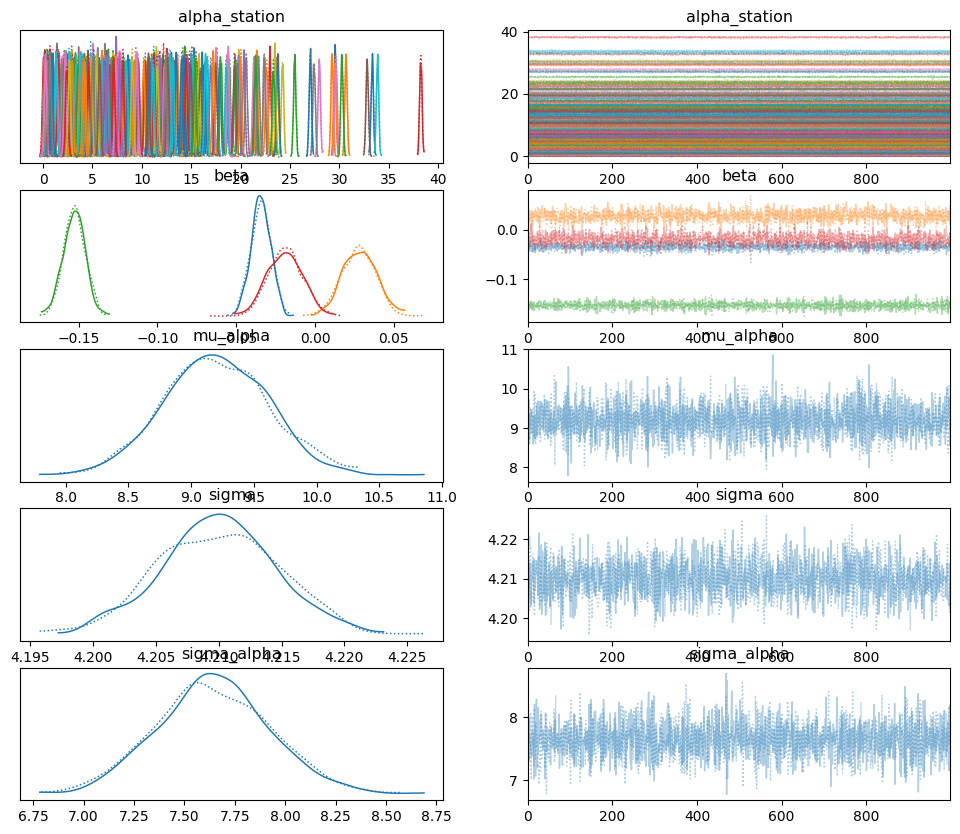

In [49]:
az.plot_trace(idata)

In [50]:
# Prepare future X (same structure as training features)
# e.g., predict for a given day/time for all stations
X_future = scaler.transform(df_full[features])
station_idx_future = df_full['station_idx'].values

predictive = Predictive(hierarchical_bike_model, posterior_samples=mcmc.get_samples())
predictions = predictive(random.PRNGKey(1), X=jnp.array(X_future), 
                         station_idx=jnp.array(station_idx_future), 
                         n_stations=n_stations)

y_pred_mean = predictions["obs"].mean(axis=0)
df_full["predicted_bikes"] = np.array(y_pred_mean)


In [ ]:
df_full

,station_id,hour,departures,arrivals,capacity,net_flow,available_bikes,empty,hour_of_day,day_of_week,month,is_weekend,station_idx,predicted_bikes
0,1.0,2019-04-01 05:00:00,0.0,0.0,30.0,0.0,15.0,0,5,0,4,0,0,29.689119
1,1.0,2019-04-01 06:00:00,0.0,0.0,30.0,0.0,15.0,0,6,0,4,0,0,29.755192
2,1.0,2019-04-01 07:00:00,0.0,0.0,30.0,0.0,15.0,0,7,0,4,0,0,29.468309
3,1.0,2019-04-01 08:00:00,0.0,2.0,30.0,2.0,17.0,0,8,0,4,0,0,29.796240
4,1.0,2019-04-01 09:00:00,0.0,0.0,30.0,0.0,17.0,0,9,0,4,0,0,29.842421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415397,769.0,2019-05-22 05:00:00,0.0,0.0,12.0,0.0,0.0,1,5,2,5,0,337,0.509295
415398,769.0,2019-05-22 06:00:00,0.0,0.0,12.0,0.0,0.0,1,6,2,5,0,337,0.377251
415399,769.0,2019-05-22 07:00:00,0.0,0.0,12.0,0.0,0.0,1,7,2,5,0,337,0.548685
415400,769.0,2019-05-22 08:00:00,0.0,0.0,12.0,0.0,0.0,1,8,2,5,0,337,0.668961


: 